In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df = '/content/drive/MyDrive/DataSet/2021_연간자료_20231228_12985.csv'
data = pd.read_csv(df, sep=',')
data

,2021,11,010,53,1,1900,1.1,3,3.1,S,...,11.1,8,7,1.2,3.2,1.3,2,31,17,14
0,2021,11,10,53,1,1900,4,4,1,S,...,9,2,2,NaN,NaN,NaN,NaN,27,18,9
1,2021,11,10,53,1,1914,8,5,1,J,...,4,NaN,NaN,NaN,NaN,NaN,NaN,5,1,4
2,2021,11,10,53,1,1918,5,3,1,S,...,1,NaN,NaN,NaN,3,3,NaN,8,7,1
3,2021,11,10,53,1,1923,10,5,1,O,...,2,NaN,NaN,NaN,NaN,NaN,NaN,19,17,2
4,2021,11,10,53,1,1945,4,3,3,S,...,3,NaN,NaN,NaN,NaN,NaN,NaN,6,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6079696,2021,39,20,62,2,2021,8,1,1,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1
6079697,2021,39,20,62,2,2021,9,1,1,G,...,NaN,2,1,1,NaN,NaN,NaN,3,1,2
6079698,2021,39,20,62,2,2021,9,1,1,G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1
6079699,2021,39,20,62,2,2021,9,1,1,I,...,1,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

In [3]:
for i, row in tqdm(data.iterrows()):
    data.loc[i, '문자데이터_개수'] = row.str.contains(r'\*').sum()

0it [00:00, ?it/s]

In [ ]:
data['문자데이터_개수'].describe()

count    6.079701e+06
mean     3.571968e-01
std      2.034926e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.300000e+01
Name: 문자데이터_개수, dtype: float64

In [ ]:
data['문자데이터_개수'].value_counts()

0.0     5886063
9.0       77623
11.0      48622
13.0      24092
12.0      20842
14.0      10204
23.0       7041
10.0       1991
15.0       1857
16.0       1045
17.0        248
19.0         35
18.0         19
20.0         11
22.0          6
21.0          2
Name: 문자데이터_개수, dtype: int64

In [4]:
str_list = list(data['문자데이터_개수'])

In [5]:
len(str_list)

6079701

In [6]:
strlist = [i for i in str_list if i != 0]

In [7]:
len(strlist)

193638

In [8]:
strdata = pd.DataFrame({"strlist":strlist})

In [9]:
strdata['strlist'].describe()

count    193638.000000
mean         11.214999
std           2.871139
min           9.000000
25%           9.000000
50%          11.000000
75%          12.000000
max          23.000000
Name: strlist, dtype: float64

In [14]:
strdata['strlist'].value_counts()

9.0     77623
11.0    48622
13.0    24092
12.0    20842
14.0    10204
23.0     7041
10.0     1991
15.0     1857
16.0     1045
17.0      248
19.0       35
18.0       19
20.0       11
22.0        6
21.0        2
Name: strlist, dtype: int64

<ipython-input-11-b4d9a8ee3b05>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=strdata, x='strlist', shade=True)


<Axes: xlabel='strlist', ylabel='Density'>

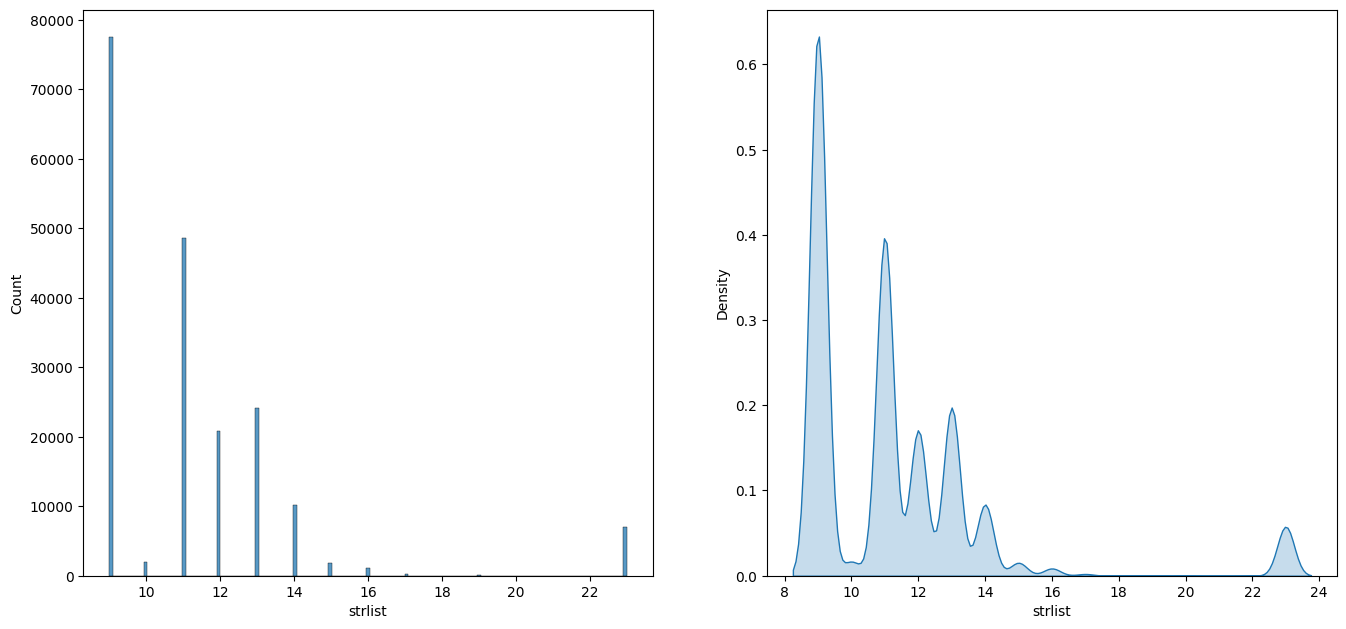

In [11]:
plt.figure(figsize=(25, 25))
plt.subplot(3, 3, 1)
sns.histplot(data=strdata, x='strlist')

plt.subplot(3, 3, 2)
sns.kdeplot(data=strdata, x='strlist', shade=True)

<ipython-input-13-918a5f952f0f>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax=ax2, a=strdata['strlist'], bins=100, color="red", label='obseved')


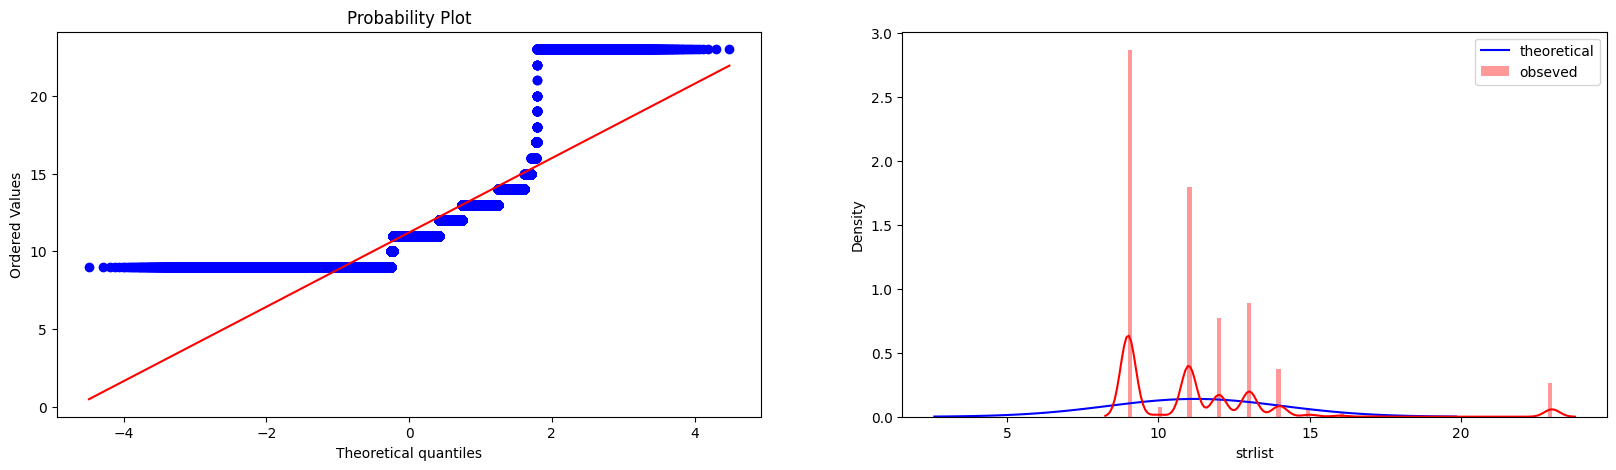

In [13]:
import scipy.stats as stats

fig = plt.figure(figsize=(20 ,5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

stats.probplot(strdata['strlist'], dist=stats.norm, plot=ax1)

mu = strdata['strlist'].mean()
variance = strdata['strlist'].var()
sigma = variance ** 0.5
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
ax2.plot(x, stats.norm.pdf(x, mu, sigma), color="blue", label='theoretical')

sns.distplot(ax=ax2, a=strdata['strlist'], bins=100, color="red", label='obseved')
ax2.legend()

plt.show()

In [ ]:
for i, row in tqdm(data.iterrows()):
    data.loc[i, 'null_counts'] = row.isnull().sum()

0it [00:00, ?it/s]

In [ ]:
data['null_counts'].describe()

count    6.079701e+06
mean     1.239261e+01
std      2.228731e+00
min      0.000000e+00
25%      1.100000e+01
50%      1.400000e+01
75%      1.400000e+01
max      1.400000e+01
Name: null_counts, dtype: float64

In [ ]:
data['null_counts'].value_counts()

14.0    3114681
12.0    1246183
11.0     771378
10.0     517799
9.0      201475
0.0       81491
8.0       70790
13.0      36871
7.0       31456
6.0        5331
4.0        1173
5.0         833
3.0         133
1.0          96
2.0          11
Name: null_counts, dtype: int64

<ipython-input-15-c0c77fa7a37d>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, x='null_counts', shade=True)


<Axes: xlabel='null_counts', ylabel='Density'>

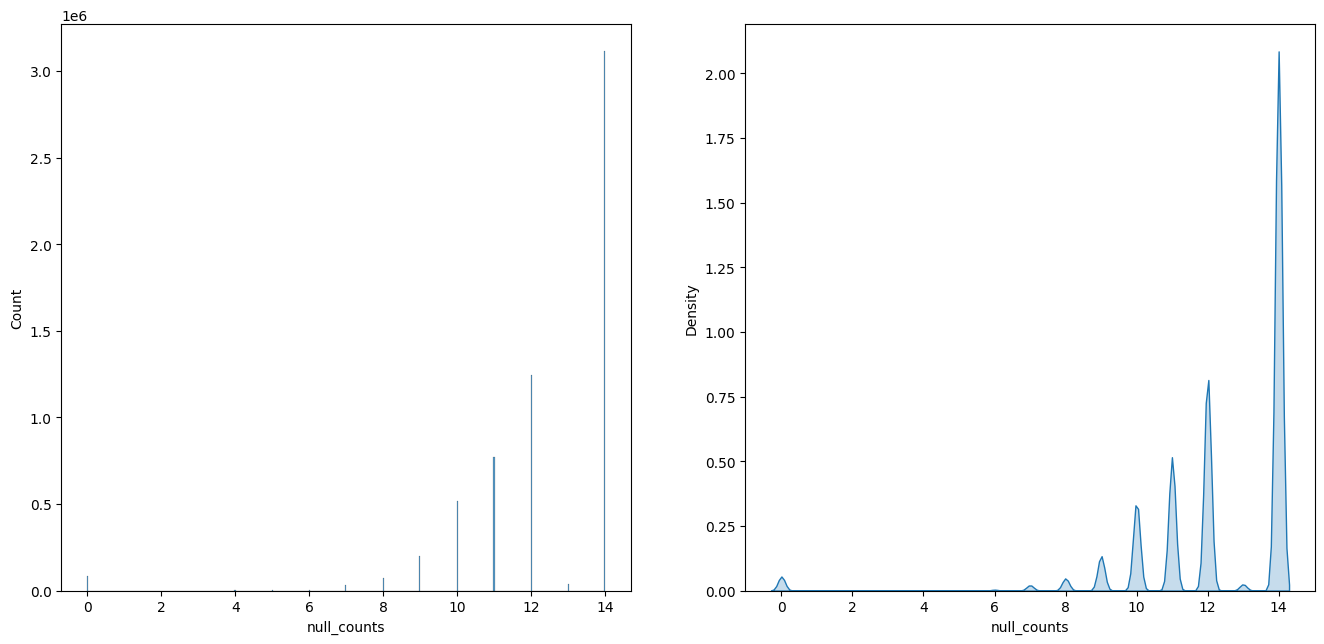

In [ ]:
plt.figure(figsize=(25, 25))
plt.subplot(3, 3, 1)
sns.histplot(data=data, x='null_counts')

plt.subplot(3, 3, 2)
sns.kdeplot(data=data, x='null_counts', shade=True)

<ipython-input-17-2baa2543a4ae>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax=ax2, a=data['null_counts'], bins=100, color="red", label='obseved')


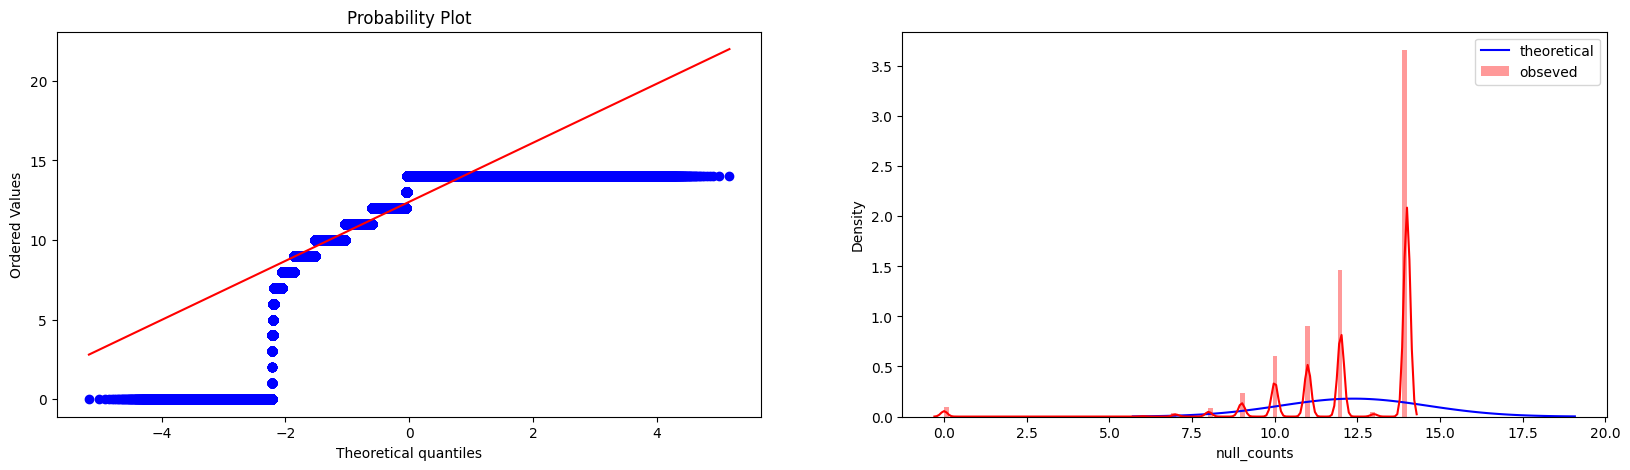

In [ ]:
import scipy.stats as stats

fig = plt.figure(figsize=(20 ,5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

stats.probplot(data['null_counts'], dist=stats.norm, plot=ax1)

mu = data['null_counts'].mean()
variance = data['null_counts'].var()
sigma = variance ** 0.5
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
ax2.plot(x, stats.norm.pdf(x, mu, sigma), color="blue", label='theoretical')

sns.distplot(ax=ax2, a=data['null_counts'], bins=100, color="red", label='obseved')
ax2.legend()

plt.show()